# Example usage of algorithms

This notebook demonstrates how our curriculum learning algorithms may be used in
the sequence-learning setting, and reproduces many of the plots found in the
main text.

In [1]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from common import *
from env import *


class NormalDist:
    def __init__(self, loc=0, scale=1) -> None:
        self.loc = loc
        self.scale = scale
    
    def __call__(self):
        return np.random.normal(loc=self.loc, scale=self.scale)


def plot_traj_and_qr(traj, qr, n_step=1, ax=None, save_path=None):
    ax = plt.gca()

    fig = plt.gcf()
    fig.set_size_inches((6.8, 2.5))
    qr = np.array(qr)
    qr = np.flip(qr.T, axis=0)
    im = ax.imshow(qr, aspect='auto', vmin=0, vmax=10, cmap='Greys')

    ticks = np.array([0, 5, 10]) * n_step
    ax.set_yticks(ticks, np.flip(np.array((0, 5, 10))))

    adj = -0.425 if n_step == 1 else 2.75
    ax.plot(10 * n_step - np.array(traj)[1:] + adj, color='red', lw=2)
    ax.set_xlim((0, len(traj) - 1.5))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.25)
    ax.spines['left'].set_linewidth(1.25)
    ax.tick_params(labelsize = 18)
    ax.set_ylabel(r"Difficulty $(k)$", fontsize = 20)
    ax.set_xlabel(r"Steps", fontsize = 20)

    cb = fig.colorbar(mappable = im)
    cb.ax.tick_params(labelsize=18)
    cb.set_ticks([0,5,10])
    cb.set_label("$q$", fontsize = 20)

    fig.tight_layout()

    if save_path:
        plt.savefig(save_path)
        

def plot_traj_slices(qr, eps, ax=None, n_steps=1):
    if ax == None:
        ax = plt.gca()
        
    if type(eps) is NormalDist:
        eps = eps.loc

    qr = np.array(qr) + eps

    cmap = mpl.colormaps['plasma']

    for i in [0, 2, 4, 7, 9]:
        ax.plot(qr[:,i*n_steps + n_steps - 1], label=f'N = {i+1}', color=cmap(i/13), alpha=0.6)

    ax.set_xlabel('Step')
    ax.set_ylabel(r'Q value')
    ax.legend()

# Incremental

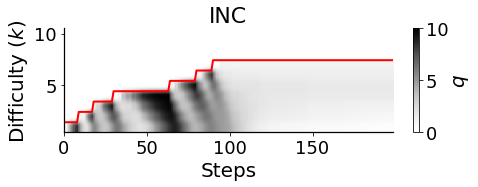

In [5]:
np.random.seed(0)

N = 10
eps_s = [-2, 0, 2]

for i, eps in enumerate(eps_s):
    traj, info = run_inc(eps=eps, goal_length=N)

    traj = traj[:200]
    qrs = np.array(info['qr'])[:200,:]
    plot_traj_and_qr(traj, qrs, n_step=1)
    plt.gcf().tight_layout()
    plt.title('INC', fontsize=22)
    plt.show()


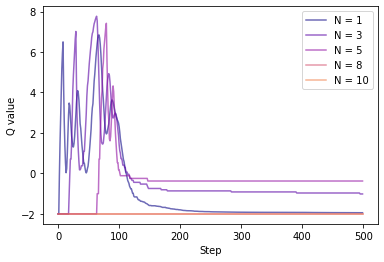

In [6]:
plot_traj_slices(info['qr'], eps)

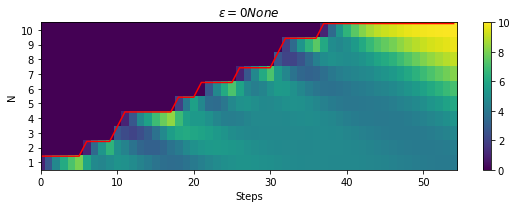

In [7]:
N = 10
eps = 0
traj, info = run_inc(eps=eps, goal_length=N)
plot_traj_and_qr(traj, info['qr'], eps, N, save_path='fig/fig2_middling_qr.png')

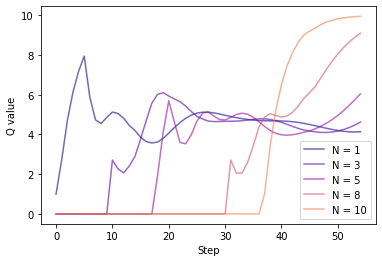

In [8]:
plot_traj_slices(info['qr'], eps)

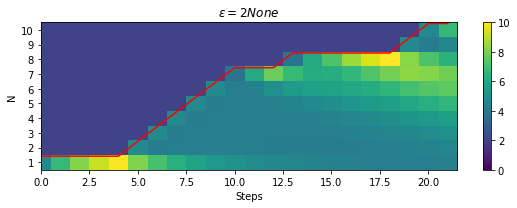

In [9]:
N = 10
eps = 2
traj, info = run_inc(eps=eps, goal_length=N)
plot_traj_and_qr(traj, info['qr'], eps, N, save_path='fig/fig2_success_qr.png')

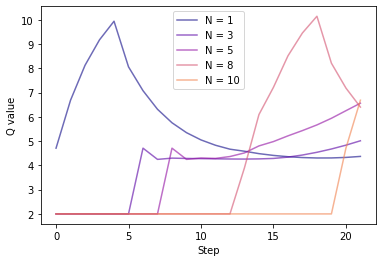

In [10]:
plot_traj_slices(info['qr'], eps)

# POMCP

Download dataframe file (`pomcp.pkl`) on the Google drive: https://drive.google.com/drive/u/1/folders/1yQ0WoPIlG-XdAXXAZLD5-Qz-3NpMtTXg

In [11]:
df = pd.read_pickle('pomcp.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'pomcp.pkl'

In [12]:
df

NameError: name 'df' is not defined

Individual rows can be plotted much in the same way as above. Below is an example of three different runs:

ROW {'eps': -2.0, 'goal_length': 10, 'gamma': 0.95}


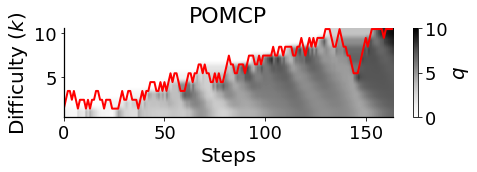

In [18]:
# fig, axs = plt.subplots(3, 2, figsize=(9, 8), sharey=False)

# N = 10
# eps = 2
# row = df.loc[14]
# traj, info = row['runs'][0], row['info'][0]
# plot_traj_and_qr(traj, info['qr'], eps, N, ax=axs[0][0])
# plot_traj_slices(info['qr'], ax=axs[0][1], eps=eps)

# N = 10
# eps = 0
# row = df.loc[12]
# traj, info = row['runs'][0], row['info'][0]
# plot_traj_and_qr(traj, info['qr'], eps, N, ax=axs[1][0])
# plot_traj_slices(info['qr'], ax=axs[1,1], eps=eps)

N = 10
eps = -2
row = df.iloc[10]
print('ROW', row.run_params)
traj, info = row['runs'][1], row['info'][1]
# plot_traj_and_qr(traj, info['qr'], eps, N, ax=axs[2,0])
plot_traj_and_qr_spec(traj, info['qr'], eps, N, n_step=1)
# plot_traj_slices(info['qr'], ax=axs[2,1], eps=eps)

plt.title('POMCP', fontsize=22)
plt.gcf().tight_layout()

plt.savefig('fig/pomcp_qs.svg')

# Adaptive

Individual plots can be made much in the same way as before. Below I plot three different examples assembled into a single image.

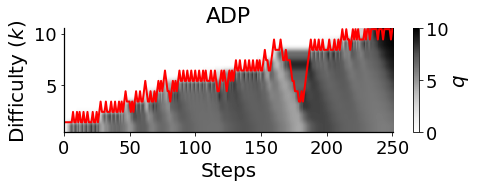

In [13]:
np.random.seed(0)

N = 10
eps_s = [-2]

for i, eps in enumerate(eps_s):
    traj, info = run_adp(eps=eps, goal_length=N)

    traj = traj
    qrs = np.array(info['qr'])
    plot_traj_and_qr_spec(traj, qrs, eps, N, n_step=1)
    plt.gcf().tight_layout()
    plt.title('ADP', fontsize=22)
    plt.savefig('fig/adaptive_qs.svg')
    plt.show()

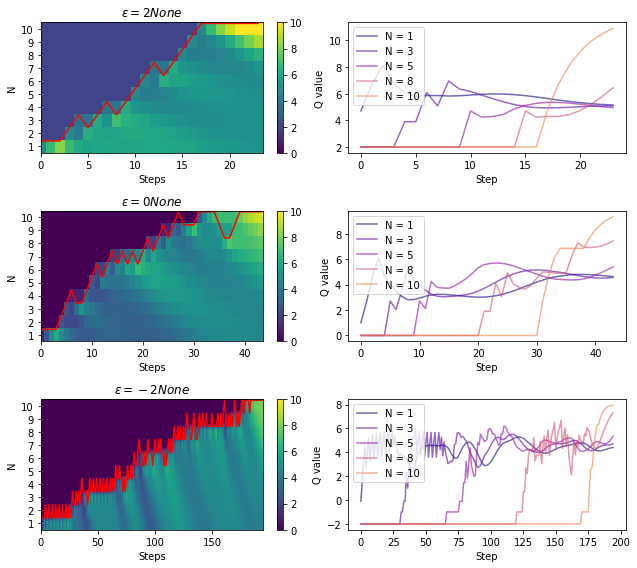

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(9, 8))

N = 10
eps = [2, 0, -2]

for e, ax in zip(eps, axs):
    traj, info = run_adp(eps=e, goal_length=N)
    plot_traj_and_qr(traj, info['qr'], e, N, ax=ax[0])
    plot_traj_slices(info['qr'], e, ax=ax[1])

plt.savefig('fig/adp_conjoined.png')

# Benchmarks

In [15]:
np.random.seed(1)

n_iters = 10
# Ns = [3, 5, 10]
Ns = [10]
eps = np.linspace(-2, 2, num=5)
# max_steps = 500

T = 3
lr = 0.1
alpha = 0.1
beta = 1
k = 5

raw_data = []

for N in tqdm(Ns):
    for e in eps:
        cases = [
            Case('ADP', run_adp, {'eps': e, 'goal_length': N}, []),
            Case('INC', run_exp, {'eps': e, 'goal_length': N}, []),
            # Case('Online', run_online, {'eps': e, 'goal_length': N, 'alpha': alpha, 'beta': beta}, []),
            # Case('Naive', run_naive, {'eps': e, 'goal_length': N, 'alpha': alpha, 'beta': beta, 'k': k}, []),
            # Case('Sampling', run_sampling, {'eps': e, 'goal_length': N, 'alpha': alpha, 'k': k}, []),
            Case('Matiisen', run_window, {'eps': e, 'goal_length': N, 'alpha': alpha, 'beta': beta, 'k': k}, []),
            Case('Random', run_random, {'eps': e, 'goal_length': N}, []),
            Case('Final', run_final_task_only, {'eps': e, 'goal_length': N}, []),
        ]

        run_exp(n_iters=n_iters, cases=cases, max_steps=N * 100, lr=lr, T=T)
        raw_data.extend(cases)

df_bench = pd.DataFrame(raw_data)
df = pd.concat((df, df_bench), ignore_index=True)

  0%|          | 0/1 [00:00<?, ?it/s]

/home/grandpaa/workspace/trails/venv_trail/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:175: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/grandpaa/workspace/trails/venv_trail/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:189: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/grandpaa/workspace/trails/venv_trail/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:192: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
100%|██████████| 1/1 [00:08<00:00,  8.84s/it]


NameError: name 'df' is not defined

In [44]:
# setting up for benchmark plotting
fig_dir = Path('fig/us_v_matiisen_v_pomcp')
if not fig_dir.exists():
    fig_dir.mkdir(parents=True)

def extract_plot_vals(row):
    traj_lens = [len(traj) for traj in row['runs']]

    return pd.Series([
        row['name'],
        row['run_params']['goal_length'],
        np.round(row['run_params']['eps'], decimals=2),
        traj_lens
    ], index=['name', 'N', 'eps', 'traj_lens'])

/tmp/ipykernel_8731/982554951.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([-2, -1, 0, 1, 2])


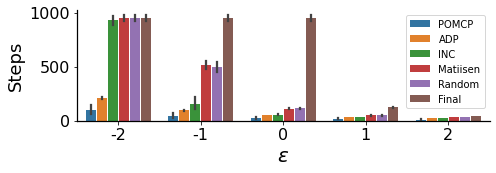

In [48]:
plot_df = df.apply(extract_plot_vals, axis=1).explode('traj_lens')

# g = sns.catplot(plot_df, x='eps', y='traj_lens', hue='name', col='N', kind='bar', sharey=False, height=3, aspect=1.4)
# g.set_axis_labels(f'$\epsilon$', 'Steps')
# g.legend.set_title('')

# plt.savefig('fig/us_v_matiisen_v_pomcp/seq_benchmarks_conjoined.png')

plt.gcf().set_size_inches(7, 2.5)

g = sns.barplot(plot_df, x='eps', y='traj_lens', hue='name', width=0.8, gap=0.1)
g.set_xlabel(r'$\varepsilon$', fontsize=20)
g.set_ylabel('Steps', fontsize=18)
g.tick_params(labelsize=16)
# g.set_yticks([0, 500, 1000])
g.set_xticklabels([-2, -1, 0, 1, 2])
g.legend().set_title('')

g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['bottom'].set_linewidth(1.25)
g.spines['left'].set_linewidth(1.25)

# g.set_title(fr'$\sigma={s}$', fontsize=22)

plt.gcf().tight_layout()
plt.savefig(f'fig/benchmark_condensed.svg')
plt.show()

# Continuous curricula

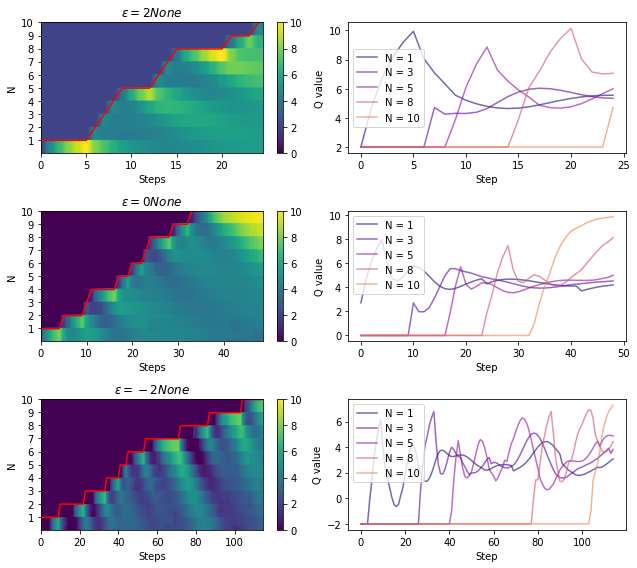

In [16]:
### Incremental
fig, axs = plt.subplots(3, 2, figsize=(9, 8))

N = 10
eps_s = [2, 0, -2]

for i, eps in enumerate(eps_s):
    traj, info = run_inc_cont(eps=eps, goal_length=N)
    plot_traj_and_qr(traj, info['qr'], eps, N, ax=axs[i,0], n_step=100)
    plot_traj_slices(info['qr'], eps, n_steps=100, ax=axs[i,1],)

plt.savefig('fig/inc_cont_conjoined.png')

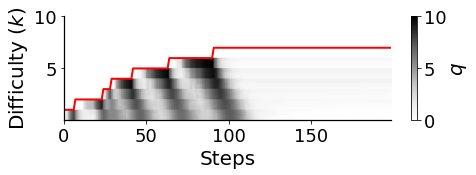

In [17]:
def plot_traj_and_qr_spec(traj, qr, eps, N, n_step=1, ax=None, save_path=None):
    if type(ax) == type(None):
        plt.clf()
        plt.gcf().set_size_inches(8, 3)
        ax = plt.gca()

    fig = plt.gcf()
    fig.set_size_inches((6.8, 2.5))
    qr = np.array(qr)
    qr = np.flip(qr.T, axis=0)
    im = ax.imshow(qr, aspect='auto', vmin=0, vmax=10, cmap='Greys')

    ticks = np.array([0, 5, 10]) * n_step
    ax.set_yticks(ticks, np.flip(np.array((0, 5, 10))))
    # ax.set_title('Incremental', fontsize=20)

    adj = -0.425 if n_step == 1 else 2.75
    ax.plot(10 * n_step - np.array(traj)[1:] + adj, color='red', lw=2)
    ax.set_xlim((0, len(traj) - 1.5))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.25)
    ax.spines['left'].set_linewidth(1.25)
    ax.tick_params(labelsize = 18)
    ax.set_ylabel(r"Difficulty $(k)$", fontsize = 20)
    ax.set_xlabel(r"Steps", fontsize = 20)

    cb = fig.colorbar(mappable = im)
    cb.ax.tick_params(labelsize=18)
    cb.set_ticks([0,5,10])
    cb.set_label("$q$", fontsize = 20)

    fig.tight_layout()

    if save_path:
        plt.savefig(save_path)

np.random.seed(4)

N = 10
eps_s = [-2]

for i, eps in enumerate(eps_s):
    traj, info = run_inc_cont(eps=eps, goal_length=N)

    traj = traj[:200]
    qrs = np.array(info['qr'])[:200,:]
    plot_traj_and_qr_spec(traj, qrs, eps, N, n_step=100)
    plt.savefig('fig/incremental_qs.svg')
    plt.show()


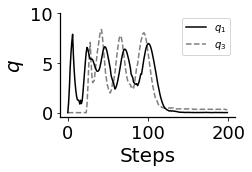

In [18]:
def plot_traj_slices(qr, eps, n_steps=1):
    qr = np.array(qr) + eps

    # cmap = mpl.colormaps['plasma']

    # for i in [0, 2, 4, 7, 9]:
    #     ax.plot(qr[:,i*n_steps + n_steps - 1], label=f'N = {i+1}', color=cmap(i/13), alpha=0.6)

    fig,ax = plt.subplots(1,1,figsize = (3,2.5))
    ax.plot(qr[:,0],'k-',lw=1.5,label = r"$q_1$")
    ax.plot(qr[:,200],'k--',lw = 1.5,alpha = 0.5,label = r"$q_3$")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.25)
    ax.spines['left'].set_linewidth(1.25)
    ax.tick_params(labelsize = 18)
    ax.set_yticks([0,5,10])
    # ax.set_xlim(0,120)
    # ax.set_xticks([0,40,80,120])
    ax.set_ylabel(r"$q$", fontsize = 20)
    ax.set_xlabel(r"Steps", fontsize = 20)
    fig.tight_layout()
    ax.legend()

np.random.seed(4)
N = 10
epss = [-2]
for ie,eps in enumerate(epss):
    traj, info = run_inc_cont(eps=eps, goal_length=N)
    qrs = np.array(info['qr'])[:200] - eps

    plot_traj_slices(qrs, eps)

    plt.savefig('fig/inc_traj_slice.svg')
    plt.gcf().set_size_inches(4, 2.5)
    plt.show()


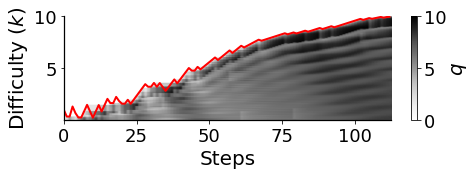

In [19]:
np.random.seed(6)

N = 10
eps_s = [-2]

for i, eps in enumerate(eps_s):
    traj, info = run_adp_cont(eps=eps, goal_length=N)

    # traj = traj[:200]
    # qrs = np.array(info['qr'])[:200,:]
    plot_traj_and_qr_spec(traj, info['qr'], eps, N, n_step=100)
    # plt.savefig('fig/incremental_qs.svg')
    plt.gcf().set_size_inches(6.8, 2.5)
    plt.gca().set_xticks([0, 25, 50, 75, 100])
    plt.savefig('fig/adp_qs.svg')
    plt.show()

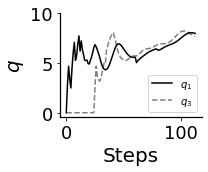

In [20]:
np.random.seed(6)
N = 10
epss = [-2]
for ie,eps in enumerate(epss):
    traj, info = run_adp_cont(eps=eps, goal_length=N)

    qr = np.array(info['qr']) - eps
    plot_traj_slices(qr, eps)

    plt.gcf().set_size_inches(3, 2.5)
    plt.savefig('fig/adp_traj_slice.svg')
    plt.show()

TypeError: plot_traj_slices() got an unexpected keyword argument 'ax'

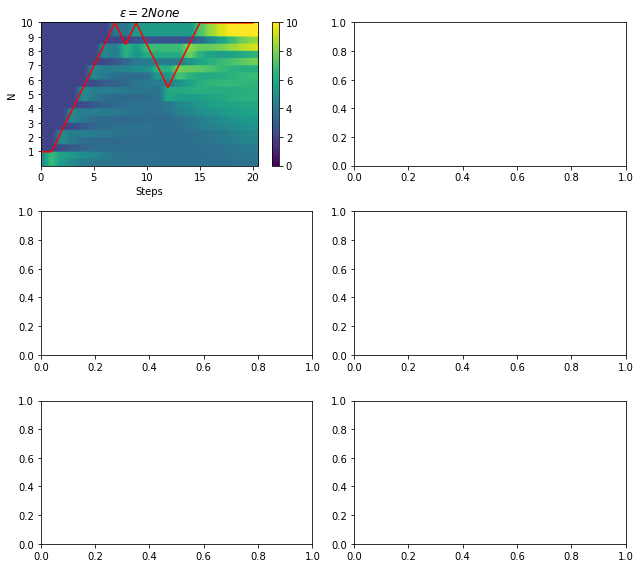

In [21]:
### Adaptive
fig, axs = plt.subplots(3, 2, figsize=(9, 8))

N = 10
eps_s = [2, 0, -2]

for i, eps in enumerate(eps_s):
    traj, info = run_adp_cont(eps=eps, goal_length=N)
    plot_traj_and_qr(traj, info['qr'], eps, N, ax=axs[i,0], n_step=100)
    plot_traj_slices(info['qr'], eps, n_steps=100, ax=axs[i,1])

plt.savefig('fig/exp_cont_conjoined.png')

In [2]:
### Benchmarks
n_iters = 5
Ns = [10]
eps = np.linspace(-3, 2, num=6)
# max_steps = 500

T = 3
lr = 0.1
alpha = 0.1
beta = 1
k = 5

raw_data = []

for N in tqdm(Ns):
    for e in eps:
        cases = [
            Case('ADP', run_adp_cont, {'eps': e, 'goal_length': N}, []),
            Case('INC', run_inc_cont, {'eps': e, 'goal_length': N}, []),
            
            # Random and Final do not work on continuous curricula, and so are commented out
            # ---
            # Case('Random', run_random, {'eps': e, 'goal_length': N, 'is_cont': True}, []),
            # Case('Final', run_final_task_only, {'eps': e, 'goal_length': N, 'is_cont': True}, []),
        ]

        run_exp(n_iters=n_iters, cases=cases, max_steps=N * 100, lr=lr, T=T)
        raw_data.extend(cases)

df = pd.DataFrame(raw_data)

100%|██████████| 1/1 [01:20<00:00, 80.35s/it]


In [3]:
# Setting up for benchmarks plotting
fig_dir = Path('fig/benchmark_cont')
if not fig_dir.exists():
    fig_dir.mkdir(parents=True)

def extract_plot_vals(row):
    traj_lens = [len(traj) for traj in row['runs']]

    return pd.Series([
        row['name'],
        row['run_params']['goal_length'],
        np.round(row['run_params']['eps'], decimals=2),
        traj_lens
    ], index=['name', 'N', 'eps', 'traj_lens'])

In [4]:
plot_df = df.apply(extract_plot_vals, axis=1).explode('traj_lens')

/tmp/ipykernel_27977/3826725202.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([-3, -2, -1, 0, 1, 2])


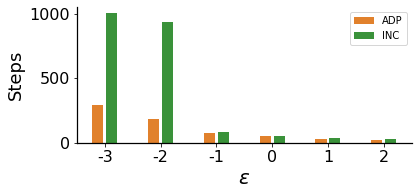

In [37]:
plt.gcf().set_size_inches(6, 2.5)

g = sns.barplot(plot_df, x='eps', y='traj_lens', hue='name', palette=['C1', 'C2'], errorbar=None, width=0.5, gap=0.2)
g.set_xlabel(r'$\varepsilon$', fontsize=20)
g.set_ylabel('Steps', fontsize=18)
g.tick_params(labelsize=16)
g.set_yticks([0, 500, 1000])
g.set_xticklabels([-3, -2, -1, 0, 1, 2])
g.legend().set_title('')

g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['bottom'].set_linewidth(1.25)
g.spines['left'].set_linewidth(1.25)

plt.savefig('fig/cont_bench.svg')

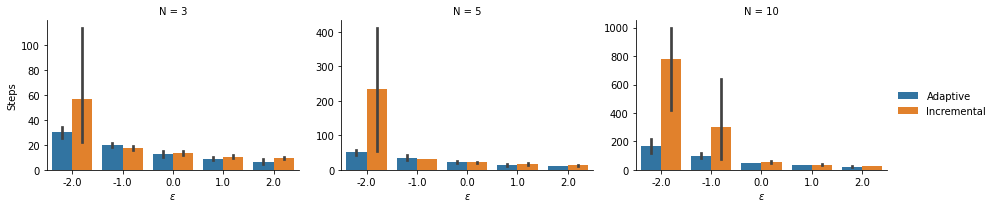

In [21]:
# plot_df = df.apply(extract_plot_vals, axis=1).explode('traj_lens')

# g = sns.catplot(plot_df, x='eps', y='traj_lens', hue='name', col='N', kind='bar', sharey=False, height=3, aspect=1.4)
# g.set_axis_labels(f'$\epsilon$', 'Steps')
# g.legend.set_title('')

plt.savefig(fig_dir / 'cont_benchmarks_conjoined.png')plt.close("all")
fig,axis = plt.subplots(1,1,figsize = (10,2.5))

colors = ["C%d"%(i+1) for i in range(8)]
for i in range(6):
    axis.bar(np.linspace(-0.3,0.3,8)+ epss[i],data_bench_means[i], width=0.05, color=colors)

axis.bar(epss_pomcp - 0.38, data_pomcp_means, width = 0.05, color = 'C0', label = 'POMCP')
names_plot = ["ADP", "INC", "Online", "Naive", "Window","Sampling", "RAND", "Final"]
for j in range(8):
    axis.bar([1],[0],color = colors[j],label = names_plot[j])
    
axis.spines['top'].set_visible(False)
axis.spines['right'].set_visible(False)
axis.spines['bottom'].set_linewidth(1.25)
axis.spines['left'].set_linewidth(1.25)
axis.tick_params(labelsize = 16)
axis.legend(bbox_to_anchor=(1.02, 1.025), frameon=False, fontsize = 10)
axis.set_ylabel("Steps",fontsize = 18)
axis.set_xlabel(r"$\varepsilon$",fontsize = 20)
fig.tight_layout()
fig.savefig(prefix + "fig3_seqtask_benchmarks.pdf")
plt.show()

# Heterogeneous epsilon

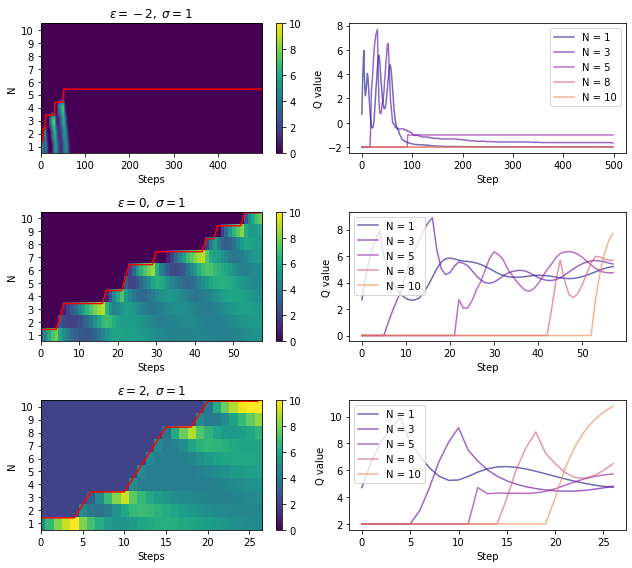

In [30]:
### INCREMENTAL
fig, axs = plt.subplots(3, 2, figsize=(9, 8))

N = 10
eps = [NormalDist(-2, 1), NormalDist(0, 1), NormalDist(2, 1)]

for e, ax in zip(eps, axs):
    traj, info = run_exp_inc(eps=e, goal_length=N)
    plot_traj_and_qr(traj, info['qr'], e, N, ax=ax[0])
    plot_traj_slices(info['qr'], e, ax=ax[1])

plt.savefig('fig/inc_hetero_sig1.png')

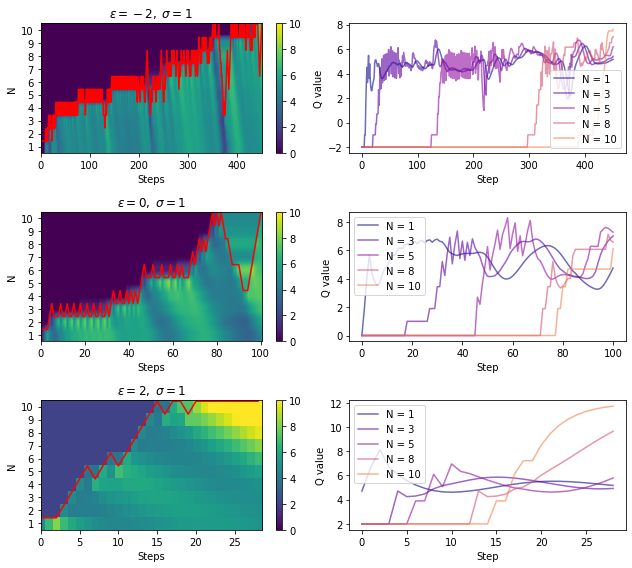

In [35]:
### ADAPTIVE
fig, axs = plt.subplots(3, 2, figsize=(9, 8))

N = 10
eps = [NormalDist(-2, 1), NormalDist(0, 1), NormalDist(2, 1)]

for e, ax in zip(eps, axs):
    traj, info = run_adp_exp_disc(eps=e, goal_length=N)
    plot_traj_and_qr(traj, info['qr'], e, N, ax=ax[0])
    plot_traj_slices(info['qr'], e, ax=ax[1])

plt.savefig('fig/adp_hetero_sig1.png')

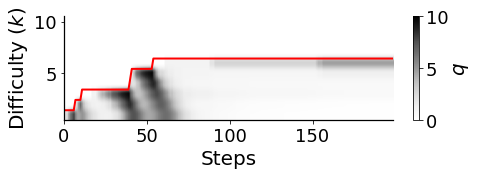

In [4]:
def plot_traj_and_qr_spec(traj, qr, eps, N, n_step=1, ax=None, save_path=None):
    if type(ax) == type(None):
        plt.clf()
        plt.gcf().set_size_inches(8, 3)
        ax = plt.gca()

    fig = plt.gcf()
    fig.set_size_inches((6.8, 2.5))
    qr = np.array(qr)
    qr = np.flip(qr.T, axis=0)
    im = ax.imshow(qr, aspect='auto', vmin=0, vmax=10, cmap='Greys')

    ticks = np.array([0, 5, 10]) * n_step
    ax.set_yticks(ticks, np.flip(np.array((0, 5, 10))))
    # ax.set_title('Incremental', fontsize=20)

    adj = -0.425 if n_step == 1 else 2.75
    ax.plot(10 * n_step - np.array(traj)[1:] + adj, color='red', lw=2)
    ax.set_xlim((0, len(traj) - 1.5))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.25)
    ax.spines['left'].set_linewidth(1.25)
    ax.tick_params(labelsize = 18)
    ax.set_ylabel(r"Difficulty $(k)$", fontsize = 20)
    ax.set_xlabel(r"Steps", fontsize = 20)

    cb = fig.colorbar(mappable = im)
    cb.ax.tick_params(labelsize=18)
    cb.set_ticks([0,5,10])
    cb.set_label("$q$", fontsize = 20)

    fig.tight_layout()

    if save_path:
        plt.savefig(save_path)

np.random.seed(4)

N = 10
eps_s = [-1]

for i, eps in enumerate(eps_s):
    traj, info = run_inc(eps=NormalDist(loc=eps, scale=1), goal_length=N)

    traj = traj[:200]
    qrs = np.array(info['qr'])[:200,:]
    plot_traj_and_qr_spec(traj, qrs, eps, N, n_step=1)
    plt.gcf().tight_layout()
    plt.savefig('fig/incremental_qs_hetero.svg')
    plt.show()

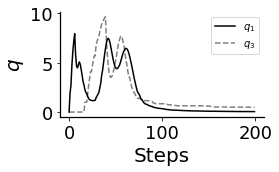

In [10]:
def plot_traj_slices(qr, eps, n_steps=1):
    qr = np.array(qr) + eps

    # cmap = mpl.colormaps['plasma']

    # for i in [0, 2, 4, 7, 9]:
    #     ax.plot(qr[:,i*n_steps + n_steps - 1], label=f'N = {i+1}', color=cmap(i/13), alpha=0.6)

    fig,ax = plt.subplots(1,1,figsize = (3,2.5))
    ax.plot(qr[:,0],'k-',lw=1.5,label = r"$q_1$")
    ax.plot(qr[:,2*n_steps],'k--',lw = 1.5,alpha = 0.5,label = r"$q_3$")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.25)
    ax.spines['left'].set_linewidth(1.25)
    ax.tick_params(labelsize = 18)
    ax.set_yticks([0,5,10])
    # ax.set_xlim(0,120)
    # ax.set_xticks([0,40,80,120])
    ax.set_ylabel(r"$q$", fontsize = 20)
    ax.set_xlabel(r"Steps", fontsize = 20)
    fig.tight_layout()
    ax.legend()

np.random.seed(4)
N = 10
epss = [-1]
for ie,eps in enumerate(epss):
    traj, info = run_inc(eps=NormalDist(loc=eps, scale=1), goal_length=N)
    qrs = np.array(info['qr'])[:200] - eps

    plot_traj_slices(qrs, eps)

    plt.savefig('fig/inc_traj_slice_hetero.svg')
    plt.gcf().set_size_inches(4, 2.5)
    
    plt.gcf().tight_layout()
    plt.show()

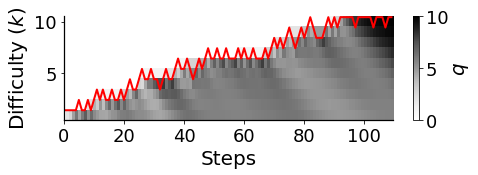

In [11]:
np.random.seed(4)

N = 10
eps_s = [-1]

for i, eps in enumerate(eps_s):
    traj, info = run_adp(eps=NormalDist(loc=eps, scale=1), goal_length=N)

    traj = traj[:200]
    qrs = np.array(info['qr'])[:200,:]
    plot_traj_and_qr_spec(traj, qrs, eps, N, n_step=1)
    plt.gcf().tight_layout()
    plt.savefig('fig/adp_qs_hetero.svg')
    plt.show()

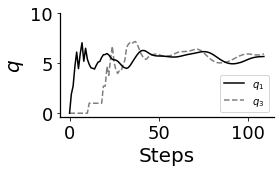

In [12]:
np.random.seed(4)
N = 10
epss = [-1]
for ie,eps in enumerate(epss):
    traj, info = run_adp(eps=NormalDist(loc=eps, scale=1), goal_length=N)
    qrs = np.array(info['qr'])[:200] - eps

    plot_traj_slices(qrs, eps)

    plt.savefig('fig/adp_traj_slice_hetero.svg')
    plt.gcf().set_size_inches(4, 2.5)
    
    plt.gcf().tight_layout()
    plt.show()

In [13]:
# BENCHMARKS
n_iters = 10
# Ns = [3, 5, 10]
Ns = [10]
eps = np.linspace(-2, 2, num=5)
sigs = [1, 3]
# max_steps = 500

T = 3
lr = 0.1

raw_data = []

for N in tqdm(Ns):
    for e in eps:
        for s in sigs:
            eps_dist = NormalDist(loc=e, scale=s)
            cases = [
                Case('Adaptive', run_adp, {'eps': eps_dist, 'goal_length': N}, []),
                Case('Incremental', run_inc, {'eps': eps_dist, 'goal_length': N}, []),
                Case('Random', run_random, {'eps': eps_dist, 'goal_length': N}, []),
            ]

            run_exp(n_iters=n_iters, cases=cases, max_steps=N * 100, lr=lr, T=T)
            raw_data.extend(cases)

df = pd.DataFrame(raw_data)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:14<00:00, 14.29s/it]


/tmp/ipykernel_8169/1315751847.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([-2, -1, 0, 1, 2])


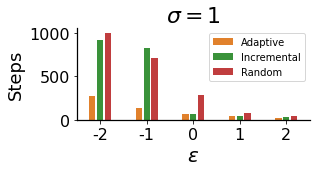

/tmp/ipykernel_8169/1315751847.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels([-2, -1, 0, 1, 2])


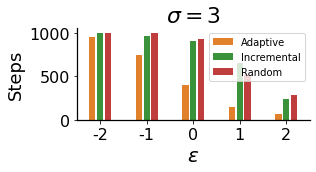

In [20]:
# setting up for benchmark plotting
fig_dir = Path('fig/hetero_eps')
if not fig_dir.exists():
    fig_dir.mkdir(parents=True)

def extract_plot_vals(row):
    traj_lens = [len(traj) for traj in row['runs']]

    return pd.Series([
        row['name'],
        row['run_params']['goal_length'],
        np.round(row['run_params']['eps'].loc, decimals=2),
        np.round(row['run_params']['eps'].scale, decimals=2),
        traj_lens
    ], index=['name', 'N', 'eps', 'sig', 'traj_lens'])


plot_df = df.apply(extract_plot_vals, axis=1).explode('traj_lens')

for s in sigs:
    plt.gcf().set_size_inches(4.5, 2.5)

    g = sns.barplot(plot_df[plot_df['sig'] == s], x='eps', y='traj_lens', hue='name', palette=['C1', 'C2', 'C3'], errorbar=None, width=0.5, gap=0.2)
    g.set_xlabel(r'$\varepsilon$', fontsize=20)
    g.set_ylabel('Steps', fontsize=18)
    g.tick_params(labelsize=16)
    g.set_yticks([0, 500, 1000])
    g.set_xticklabels([-2, -1, 0, 1, 2])
    g.legend().set_title('')

    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['bottom'].set_linewidth(1.25)
    g.spines['left'].set_linewidth(1.25)

    g.set_title(fr'$\sigma={s}$', fontsize=22)

    plt.gcf().tight_layout()
    plt.savefig(fig_dir / f'hetero_eps_sig_{s}.svg')
    plt.show()

